In [1]:
%matplotlib inline

## Linear Models: [Orthogonal Matching Pursuit (OMP)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.OrthogonalMatchingPursuit.html#sklearn.linear_model.OrthogonalMatchingPursuit)
- Approximates a linear model with constraints on the number of non-zero coefficients (the $\ell_0$ norm.)
- Forward-feature selection method, much like [LARS](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression).
- Optimum vector: 
    $\underset{w}{\operatorname{arg\,min\,}}  ||y - Xw||_2^2 \text{ subject to } ||w||_0 \leq n_{\text{nonzero\_coefs}}$
- Alternative solution: target a specific error (instead of a specific number of non-zero coefficients): 
    $\underset{w}{\operatorname{arg\,min\,}} ||w||_0 \text{ subject to } ||y-Xw||_2^2 \leq \text{tol}$

Example: using OMP to recover sparse signal from noisy measurement encoded with a dictionary.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets     import make_sparse_coded_signal

n_components, n_features, n_nonzero_coefs = 512, 100, 17

# generate the data: y = Xw, |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(
    n_samples       = 1,
    n_components    = n_components,
    n_features      = n_features,
    n_nonzero_coefs = n_nonzero_coefs,
    random_state    = 0)

print(w.shape)
idx, = w.nonzero()
print(idx,)

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

(512,)
[ 46  68  76 101 123 158 195 226 227 268 269 355 359 399 467 492 494]


<StemContainer object of 3 artists>

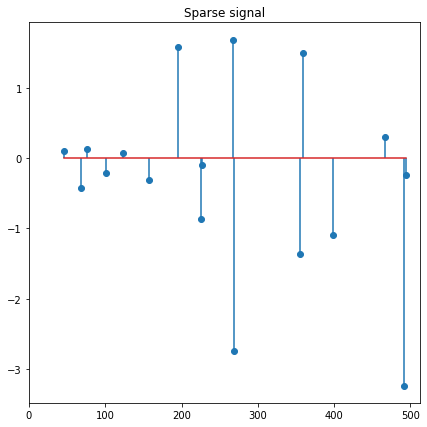

In [3]:
# plot the sparse signal
plt.figure(figsize=(7, 7))
#plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx], use_line_collection=True)

<StemContainer object of 3 artists>

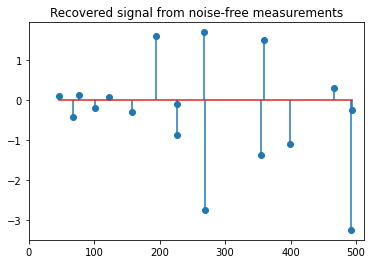

In [4]:
# plot noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef   = omp.coef_
idx_r, = coef.nonzero()

#plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

<StemContainer object of 3 artists>

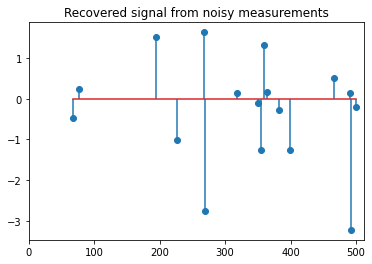

In [5]:
# plot noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()

#plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

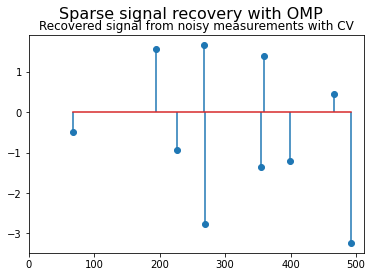

In [6]:
# plot the noisy reconstruction with number of non-zeros set by CV
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()

plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)
plt.suptitle('Sparse signal recovery with OMP',
             fontsize=16)
plt.show()